<a href="https://colab.research.google.com/github/rohilahuja3/Ai_Final_labs/blob/main/Final_Naive_bayes_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AI LAB 5 Naive Bais**
####ROHIL AHUJA 20BRS1204

#**Initial step to mount and Display**

1) Mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Ai_lab_new/Lab5_Naive

/content/drive/MyDrive/Ai_lab_new/Lab5_Naive


2) Importing header files

In [ ]:
import numpy as np
import pandas as pd

3) Printing the dataset

In [ ]:
data = pd.read_csv('lab5_q1_dataset.csv')
print(data)

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


**Q1)**

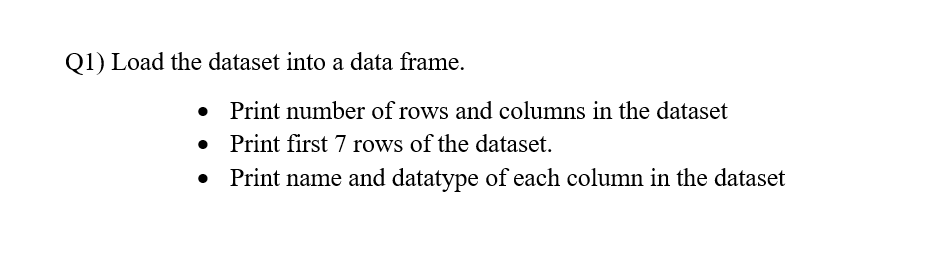

In [ ]:
print("1) The number of rows and coloums are: \n")
print("ROWS: ",len(data.axes[0]),"\n")  #print rows
print("COLOUMS: ",len(data.axes[1]),"\n")  #print coloums

print("2) First 7 rows of the dataset are: \n")
print(data.head(7),"\n")

print("3) The name and datatype of each column in the dataset are: \n")
print(data.info())

1) The number of rows and coloums are: 

ROWS:  14 

COLOUMS:  6 

2) First 7 rows of the dataset are: 

  day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes
5  D6      Rain  Cool   Normal  Strong   No
6  D7  Overcast  Cool   Normal  Strong  Yes 

3) The name and datatype of each column in the dataset are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes
None


#**Hard Codes Naive bayes**

***FORMULAS USED FOR THIS LAB ASSIGNMENT***


**1) BAYES THEORM FORMULA**

  *P( YES / <RAIN, COOL, HIGH, STRONG> ) = P( <RAIN, COOL, HIGH, STRONG> / YES )  *   P( YES ) / P( <RAIN, COOL, HIGH, STRONG> )*

  *P( NO / <RAIN, COOL, HIGH, STRONG> ) = P( <RAIN, COOL, HIGH, STRONG> / NO )  *   P( NO ) / P( <RAIN, COOL, HIGH, STRONG> )*

**2) LIKELIHOOD**

  *P( <RAIN, COOL, HIGH, STRONG> / YES ) = P( RAIN / YES ) * P( COOL / YES ) * P( HIGH / YES ) * P( STRONG / YES )*

  *P( <RAIN, COOL, HIGH, STRONG> / NO ) = P( RAIN / NO ) * P( COOL / NO ) * P( HIGH / NO ) * P( STRONG / NO )*

**Q2)** 


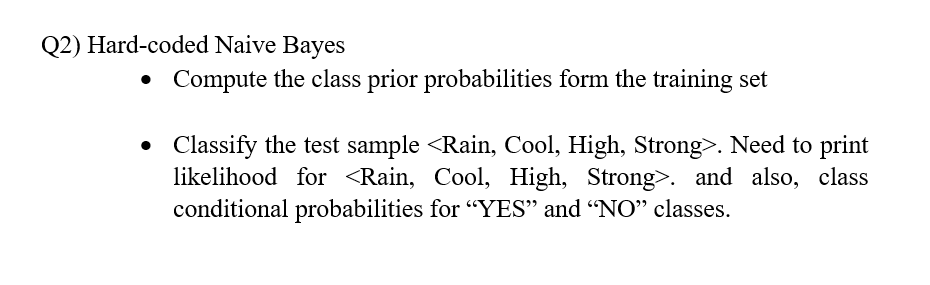

In [ ]:
# class prior probabilities in this case would be that if the child will go and play or not under the circumstances given that is <rain,cool,high,strong>.
# so basically we need to find p(YES or NO) from the above formula

play_count = data.groupby('play').size()
print(play_count,"\n")

play_yes=play_count['Yes']
print("Number of YES in play class: ", play_yes,"\n")
play_no=play_count['No']
print("Number of NO in play class: ", play_no,"\n")

p_play_yes=play_yes/data.shape[0]   # data.shape[0] = no. of coloums or u can also use len(data.axes[0])
p_play_no=play_no/data.shape[0]
print("Yes class prior probability: ", p_play_yes,"\n")
print("No class prior probability: ", p_play_no)

play
No     5
Yes    9
dtype: int64 

Number of YES in play class:  9 

Number of NO in play class:  5 

Yes class prior probability:  0.6428571428571429 

No class prior probability:  0.35714285714285715


In [ ]:
outlook_count = data.groupby(['outlook','play']).size()
outlook_total = data.groupby(['outlook']).size()
print("====The outlook total:====\n",outlook_total,"\n\n")
print("====The outlook count:====\n",outlook_count,"\n\n")


temp_count = data.groupby(['temp', 'play']).size()
temp_total = data.groupby(['temp']).size()
print("====The temp total:====\n",temp_total,"\n\n")
print("====The temp count:====\n",temp_count,"\n\n")


humidity_count = data.groupby(['humidity', 'play']).size()
humidity_total = data.groupby(['humidity']).size()
print("====The humidity total:====\n",humidity_total,"\n\n")
print("====The humidity count:====\n",humidity_count,"\n\n")


windy_count = data.groupby(['wind', 'play']).size()
windy_total = data.groupby(['wind']).size()
print("====The windy total:====\n",windy_total,"\n\n")
print("====The windy count:====\n",windy_count,"\n\n")




p_rainy_yes = outlook_count['Rain','Yes']
p_rainy_no = outlook_count['Rain','No']
print("p(rain with yes): ",p_rainy_yes,"\n")
print("p(rain with no): ",p_rainy_no,"\n")


p_cool_yes = temp_count['Cool', 'Yes']
p_cool_no = temp_count['Cool', 'No']
print("p(cool with yes): ",p_cool_yes,"\n")
print("p(cool with no): ",p_cool_no,"\n")


p_high_yes = humidity_count['High', 'Yes']
p_high_no = humidity_count['High', 'No']
print("p(high with yes): ",p_high_yes,"\n")
print("p(high with no): ",p_high_no,"\n")


p_strong_yes = windy_count['Strong', 'Yes']
p_strong_no = windy_count['Strong', 'No']
print("p(strong with yes): ",p_strong_yes,"\n")
print("p(strong with no): ",p_strong_no,"\n")

====The outlook total:====
 outlook
Overcast    4
Rain        5
Sunny       5
dtype: int64 


====The outlook count:====
 outlook   play
Overcast  Yes     4
Rain      No      2
          Yes     3
Sunny     No      3
          Yes     2
dtype: int64 


====The temp total:====
 temp
Cool    4
Hot     4
Mild    6
dtype: int64 


====The temp count:====
 temp  play
Cool  No      1
      Yes     3
Hot   No      2
      Yes     2
Mild  No      2
      Yes     4
dtype: int64 


====The humidity total:====
 humidity
High      7
Normal    7
dtype: int64 


====The humidity count:====
 humidity  play
High      No      4
          Yes     3
Normal    No      1
          Yes     6
dtype: int64 


====The windy total:====
 wind
Strong    6
Weak      8
dtype: int64 


====The windy count:====
 wind    play
Strong  No      3
        Yes     3
Weak    No      2
        Yes     6
dtype: int64 


p(rain with yes):  3 

p(rain with no):  2 

p(cool with yes):  3 

p(cool with no):  1 

p(high with yes):

In [ ]:
# Sample test case : <RAIN, COOL, HIGH, STRONG>
likelihood_yes=(p_rainy_yes/play_yes)*(p_cool_yes/play_yes)*(p_high_yes/play_yes)*(p_strong_yes/play_yes)
print("P( <RAIN, COOL, HIGH, STRONG> / YES ): ",likelihood_yes,"\n\n")

likelihood_no=(p_rainy_no/play_no)*(p_cool_no/play_no)*(p_high_no/play_no)*(p_strong_no/play_no)
print("P( <RAIN, COOL, HIGH, STRONG> / NO ): ",likelihood_no,"\n\n")

P( <RAIN, COOL, HIGH, STRONG> / YES ):  0.012345679012345678 


P( <RAIN, COOL, HIGH, STRONG> / NO ):  0.03840000000000001 




In [ ]:
# Clasiification
class_yes=likelihood_yes*p_play_yes
class_no=likelihood_no*p_play_yes

print("Probabilty that the outcome will be a YES, P( YES / <RAIN, COOL, HIGH, STRONG> ): ",class_yes,"\n")
print("Probabilty that the outcome will be a NO, P( NO / <RAIN, COOL, HIGH, STRONG> ): ",class_no,"\n")
print("output is: ",max(class_yes,class_no))

Probabilty that the outcome will be a YES, P( YES / <RAIN, COOL, HIGH, STRONG> ):  0.007936507936507936 

Probabilty that the outcome will be a NO, P( NO / <RAIN, COOL, HIGH, STRONG> ):  0.024685714285714293 

output is:  0.024685714285714293


#**One Hot Encodeing Method**

**Q3)**

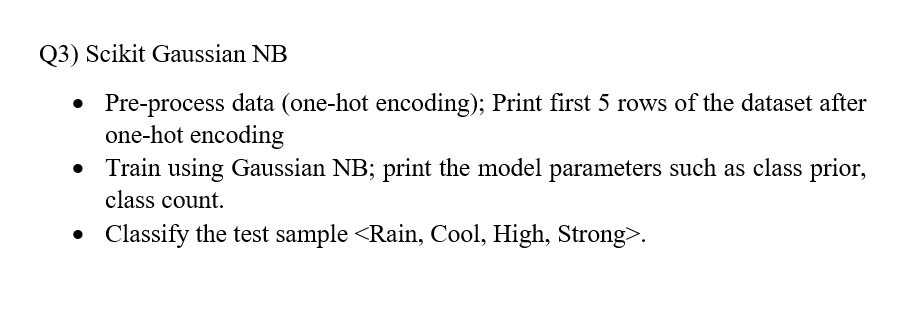

In [ ]:
print(data)

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


In [ ]:
# All the dataset provided will be used as a training data set and we'll find the answer for <RAIN, COOL, HIGH, STRONG> 
X_training = pd.get_dummies(data[['outlook', 'temp', 'humidity', 'wind']])
Y_training = pd.DataFrame(data['play'])
print("The X traning data info: \n",X_training.info(),"\n\n")
print("The X traning data info: \n",Y_training.info(),"\n\n")

print("The X traning data: \n",X_training,"\n\n")
print("The Y traning data: \n",Y_training,"\n\n")

print("Complete X training data: \n")
X_training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   outlook_Overcast  14 non-null     uint8
 1   outlook_Rain      14 non-null     uint8
 2   outlook_Sunny     14 non-null     uint8
 3   temp_Cool         14 non-null     uint8
 4   temp_Hot          14 non-null     uint8
 5   temp_Mild         14 non-null     uint8
 6   humidity_High     14 non-null     uint8
 7   humidity_Normal   14 non-null     uint8
 8   wind_Strong       14 non-null     uint8
 9   wind_Weak         14 non-null     uint8
dtypes: uint8(10)
memory usage: 268.0 bytes
The X traning data info: 
 None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   play    14 non-null     object
dtypes: object(1)
memory usage: 240.0+ bytes
The X traning data info

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [ ]:
Y_training

,play
0,No
1,No
2,Yes
3,Yes
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


In [ ]:
# <RAIN, COOL, HIGH, STRONG> 
from sklearn.naive_bayes import GaussianNB
import numpy as np
model = GaussianNB()
model.fit(X_training, Y_training)

print("The class count is: ",model.class_count_,"\n\n")   # class count is basically no. of yes and no in play
print("The class prior is: ",model.class_prior_,"\n\n")   # class prior is nothing but P( YES ) or P( NO )

# rain = 010
# cool = 100
# high = 10
# strong = 10

predicted=model.predict([[0,1,0,1,0,0,1,0,1,0]])
print("The prediction is: ",predicted,"\n\n")

The class count is:  [5. 9.] 


The class prior is:  [0.35714286 0.64285714] 


The prediction is:  ['No'] 




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


#**One hot encoding for a dataset from kaggle**

**Q4)**


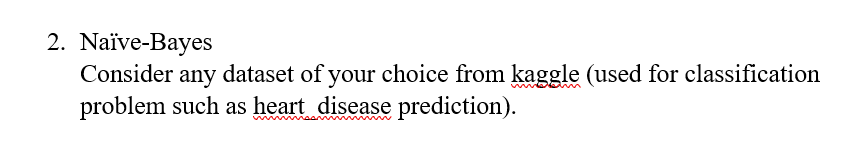

**DATA SET IS:**

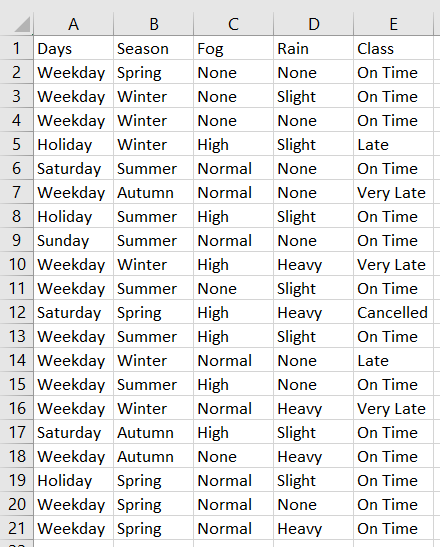

In [ ]:
pwd

'/content/drive/MyDrive/Ai_lab_new/Lab5_Naive'

In [ ]:
data_2 = pd.read_csv('lab5_q2_dataset.csv')
print(data_2)

        Days  Season     Fog    Rain      Class
0    Weekday  Spring    None    None    On Time
1    Weekday  Winter    None  Slight    On Time
2    Weekday  Winter    None    None    On Time
3    Holiday  Winter    High  Slight       Late
4   Saturday  Summer  Normal    None    On Time
5    Weekday  Autumn  Normal    None  Very Late
6    Holiday  Summer    High  Slight    On Time
7     Sunday  Summer  Normal    None    On Time
8    Weekday  Winter    High   Heavy  Very Late
9    Weekday  Summer    None  Slight    On Time
10  Saturday  Spring    High   Heavy  Cancelled
11   Weekday  Summer    High  Slight    On Time
12   Weekday  Winter  Normal    None       Late
13   Weekday  Summer    High    None    On Time
14   Weekday  Winter  Normal   Heavy  Very Late
15  Saturday  Autumn    High  Slight    On Time
16   Weekday  Autumn    None   Heavy    On Time
17   Holiday  Spring  Normal  Slight    On Time
18   Weekday  Spring  Normal    None    On Time
19   Weekday  Spring  Normal   Heavy    

**Q2)**


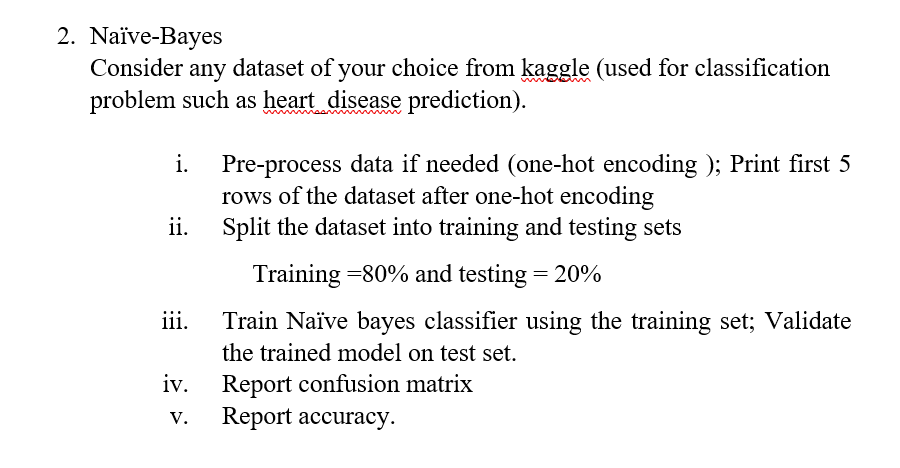

In [ ]:
# All the dataset provided will be used as a training data set and we'll find the answer for <RAIN, COOL, HIGH, STRONG> 
X = pd.get_dummies(data_2[['Days', 'Season', 'Fog', 'Rain']])
Y = pd.DataFrame(data_2['Class'])

print(X.head(5),"\n\n")
print(Y.head(5),"\n\n")

   Days_Holiday  Days_Saturday  Days_Sunday  Days_Weekday  Season_Autumn  \
0             0              0            0             1              0   
1             0              0            0             1              0   
2             0              0            0             1              0   
3             1              0            0             0              0   
4             0              1            0             0              0   

   Season_Spring  Season_Summer  Season_Winter  Fog_High  Fog_None  \
0              1              0              0         0         1   
1              0              0              1         0         1   
2              0              0              1         0         1   
3              0              0              1         1         0   
4              0              1              0         0         0   

   Fog_Normal  Rain_Heavy  Rain_None  Rain_Slight  
0           0           0          1            0  
1           0     

it randomly splits the hot encoded dataset into 2 parts testing and training

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

<Weekday, Winter, High, None>

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

accuracy = model.score(x_test,y_test)

predictedY = model.predict(x_test)
predictedResult = model.predict([[0,0,0,1,0,0,0,1,1,0,0,0,1,0]])

print("Predicted value: ", predictedY)
print("Test result: ", predictedResult)
print("accuracy is: ", accuracy)

Predicted value:  ['On Time' 'On Time' 'On Time' 'On Time']
Test result:  ['Very Late']
accuracy is:  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, predictedY)
conf_matrix = confusion_matrix(y_test, predictedY)

print(acc_score)
print(conf_matrix)

0.5
[[0 0 1]
 [0 0 1]
 [0 0 2]]
